# Movie Rating Prediction with Python

This notebook demonstrates a complete workflow for predicting movie ratings using a dataset of Indian movies from IMDb. The process includes data loading, cleaning, transformation, model training, evaluation, and visualization.

## 1. Library Imports
The necessary libraries are imported for data manipulation, numerical operations, machine learning, and visualization.

In [87]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


## 2. Dataset Loading
The dataset is loaded into a DataFrame called `movie_data`, using the appropriate encoding to handle special characters.


In [88]:
# Load the dataset
movie_data = pd.read_csv("IMDb Movies India.csv", encoding='ISO-8859-1')


## 3. Data Exploration
The structure of the dataset is displayed, and the first few rows are printed to provide an overview.


In [89]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [90]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(movie_data.head())


First few rows of the dataset:
                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Anga


## 4. Data Cleaning
- Rows with missing ratings are dropped.
- Missing values in categorical columns are filled with 'Unknown'.
- The 'Votes' column is cleaned and converted to an integer type.
- The 'Year' column is processed to extract the year as an integer.
- Median values are used to fill any remaining missing values in the 'Rating', 'Votes', and 'Duration' columns.


In [91]:
# Drop rows where the Rating is missing
movie_data_cleaned = movie_data.dropna(subset=['Rating'])


In [92]:
# Fill missing values in categorical columns with 'Unknown'
categorical_columns = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
for column in categorical_columns:
    movie_data_cleaned[column].fillna('Unknown', inplace=True)


C:\Users\shiva\AppData\Local\Temp\ipykernel_14384\1156103136.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movie_data_cleaned[column].fillna('Unknown', inplace=True)
C:\Users\shiva\AppData\Local\Temp\ipykernel_14384\1156103136.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_data_cleaned[column].fillna('Unknown', inplace=True)


In [93]:
movie_data_cleaned.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [94]:
movie_data_cleaned['Votes'] = movie_data_cleaned['Votes'].str.replace(',', '').astype(int)
movie_data_cleaned['Year'] = movie_data_cleaned['Year'].str.replace('(', '')
movie_data_cleaned['Year'] = movie_data_cleaned['Year'].str.replace(')', '').astype(int)
movie_data_cleaned['Rating'].fillna(movie_data_cleaned['Rating'].median(), inplace=True)  # Add this line



C:\Users\shiva\AppData\Local\Temp\ipykernel_14384\1625630904.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_data_cleaned['Votes'] = movie_data_cleaned['Votes'].str.replace(',', '').astype(int)
C:\Users\shiva\AppData\Local\Temp\ipykernel_14384\1625630904.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_data_cleaned['Year'] = movie_data_cleaned['Year'].str.replace('(', '')
C:\Users\shiva\AppData\Local\Temp\ipykernel_14384\1625630904.py:3: SettingWithCopyWarning: 
A value is trying to be se

In [95]:
movie_data_cleaned['Votes'] = movie_data_cleaned['Votes'].astype(int)

C:\Users\shiva\AppData\Local\Temp\ipykernel_14384\3619812429.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_data_cleaned['Votes'] = movie_data_cleaned['Votes'].astype(int)


In [96]:
# Fill missing values in numerical columns with the median
movie_data_cleaned['Votes'].fillna(movie_data_cleaned['Votes'].median(), inplace=True)
movie_data_cleaned['Year'].fillna(movie_data_cleaned['Year'].median(), inplace=True)
movie_data_cleaned['Duration'] = movie_data_cleaned['Duration'].str.extract('(\d+)').astype(float)
movie_data_cleaned['Duration'].fillna(movie_data_cleaned['Duration'].median(), inplace=True)

<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
C:\Users\shiva\AppData\Local\Temp\ipykernel_14384\450602113.py:4: SyntaxWarning: invalid escape sequence '\d'
  movie_data_cleaned['Duration'] = movie_data_cleaned['Duration'].str.extract('(\d+)').astype(float)
C:\Users\shiva\AppData\Local\Temp\ipykernel_14384\450602113.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movie_data_cleaned['Votes'].fillna(movie_data_cleaned['Votes'].median(), inplace=True)
C:\Users\shiva\AppData


## 5. Data Transformation
Categorical columns are converted into numerical format using one-hot encoding.


In [97]:
# Convert categorical columns to numerical data using one-hot encoding
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_columns = encoder.fit_transform(movie_data_cleaned[categorical_columns])
encoded_columns_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(categorical_columns))



## 6. Data Preparation
The processed dataset is combined with the encoded columns, and unnecessary categorical columns are dropped.


In [98]:
# Combine the original data with the encoded columns
movie_data_encoded = pd.concat([movie_data_cleaned, encoded_columns_df], axis=1).drop(columns=categorical_columns)


In [99]:
# Display the first few rows of the processed dataset
print("First few rows of the processed dataset:")
print(movie_data_encoded.head())


First few rows of the processed dataset:
                                 Name    Year  Duration  Rating   Votes  \
1  #Gadhvi (He thought he was Gandhi)  2019.0     109.0     7.0     8.0   
3                             #Yaaram  2019.0     110.0     4.4    35.0   
5                ...Aur Pyaar Ho Gaya  1997.0     147.0     4.7   827.0   
6                           ...Yahaan  2005.0     142.0     7.4  1086.0   
8                  ?: A Question Mark  2012.0      82.0     5.6   326.0   

   Genre_Action  Genre_Action, Adventure  Genre_Action, Adventure, Biography  \
1           0.0                      0.0                                 0.0   
3           0.0                      0.0                                 0.0   
5           0.0                      0.0                                 0.0   
6           0.0                      0.0                                 0.0   
8           0.0                      0.0                                 0.0   

   Genre_Action, Adventure,

In [100]:
movie_data_encoded.dropna(inplace=True)

In [101]:
movie_data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4145 entries, 1 to 7918
Columns: 12069 entries, Name to Actor 3_Zulfi Sayed
dtypes: float64(12068), object(1)
memory usage: 381.7+ MB


In [102]:
movie_data_encoded

,Name,Year,Duration,Rating,Votes,Genre_Action,"Genre_Action, Adventure","Genre_Action, Adventure, Biography","Genre_Action, Adventure, Comedy","Genre_Action, Adventure, Crime",...,Actor 3_Zarine Ali,Actor 3_Zayed Khan,Actor 3_Zebunissa,Actor 3_Zeenat Aman,Actor 3_Zeeshan Khan,Actor 3_Zeishan Quadri,Actor 3_Zenobia Shroff,Actor 3_Zohra,Actor 3_Zoya Hussain,Actor 3_Zulfi Sayed
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,#Yaaram,2019.0,110.0,4.4,35.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,...Aur Pyaar Ho Gaya,1997.0,147.0,4.7,827.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,...Yahaan,2005.0,142.0,7.4,1086.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,?: A Question Mark,2012.0,82.0,5.6,326.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7905,Kuku Mathur Ki Jhand Ho Gayi,2014.0,109.0,5.3,243.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7908,Kuldip Patwal: I Didn't Do It!,2017.0,128.0,6.6,614.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7914,Kundan,1955.0,150.0,6.5,16.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7915,Kundan,1993.0,137.0,5.8,40.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



## 7. Train-Test Split
The dataset is split into features (`X`) and the target variable (`y`), followed by a train-test split.


In [103]:
# Split the data into training and testing sets
X = movie_data_encoded.drop(columns=['Rating', 'Name'])
y = movie_data_encoded['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



## 8. Model Training
A Random Forest Regressor model is instantiated and trained on the training dataset.


In [104]:
# Train a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)


## 9. Predictions and Evaluation
Predictions are made on the test set, and the model's performance is evaluated using Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).


In [105]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [106]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Absolute Error: 0.9119155609167673
Root Mean Squared Error: 1.2208540169733446



## 10. Visualization
The distribution of actual versus predicted ratings is visualized using histograms.


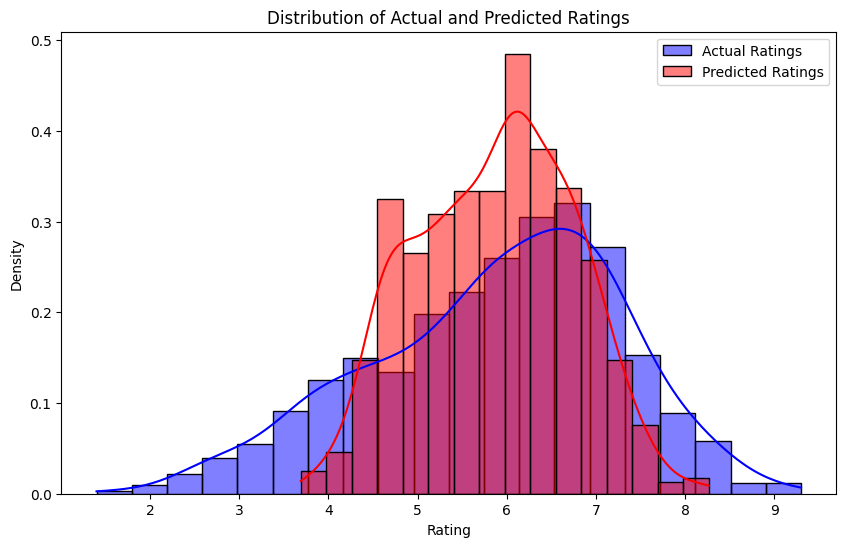

In [107]:
# Plot the distribution of the actual and predicted ratings
plt.figure(figsize=(10, 6))
sns.histplot(y_test, color='blue', label='Actual Ratings', kde=True, stat="density")
sns.histplot(y_pred, color='red', label='Predicted Ratings', kde=True, stat="density")
plt.title('Distribution of Actual and Predicted Ratings')
plt.legend()
plt.show()



This notebook provides a comprehensive approach to predicting movie ratings, showcasing data preprocessing, model training, and evaluation techniques.